In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Y')

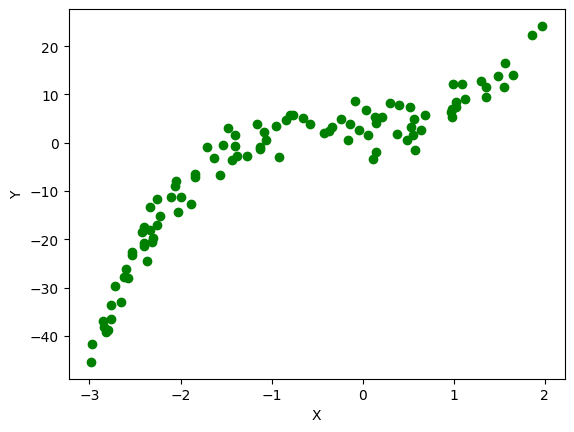

In [5]:
x = 5*np.random.rand(100, 1) - 3
y = 2*x**3 + x**2 + 0.5*x + 3 + np.random.randn(100, 1)*3
plt.scatter(x, y, color='g')
plt.xlabel('X')
plt.ylabel('Y')

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Implementing Simple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
Regression_1 = LinearRegression()

In [8]:
Regression_1.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Regression_1.predict(x_test))
print("R2 Score:", r2)

R2 Score: 0.82376274177881


Text(0.5, 1.0, 'Polynomial Linear Regression')

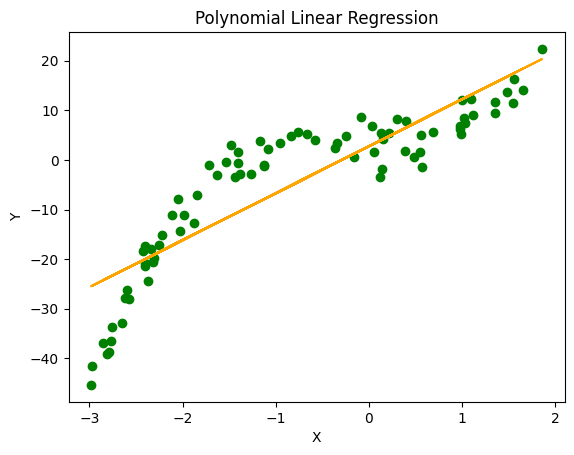

In [14]:
# lets visualize the results
plt.plot(x_train, Regression_1.predict(x_train), color='orange')
plt.scatter(x_train, y_train, color='g')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Linear Regression')

### Problem with Non-Linear Data

the non-linear data cannot be fitted properly with simple linear regression. Hence we need to transform the data to fit it properly. One of the ways to do this is by using Polynomial Features.

## Let's Apply Polynomial Transformation

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly = PolynomialFeatures(degree=2 , include_bias=True)     # include_bias will add the intercept term
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

**Here also the difference in fit_transform and transform is Same**

so we will use fit_transform on training data and transform on test data because we want to use the same transformation on test data as we used on training data.

this also prevents data leakage.

In [21]:
x_poly_train

array([[ 1.00000000e+00, -2.42044516e+00,  5.85855477e+00],
       [ 1.00000000e+00,  1.35237459e+00,  1.82891702e+00],
       [ 1.00000000e+00, -1.26595063e+00,  1.60263100e+00],
       [ 1.00000000e+00,  5.74058086e-01,  3.29542686e-01],
       [ 1.00000000e+00, -1.53702009e+00,  2.36243077e+00],
       [ 1.00000000e+00, -2.61914222e+00,  6.85990598e+00],
       [ 1.00000000e+00, -2.75847146e+00,  7.60916478e+00],
       [ 1.00000000e+00, -1.12227167e+00,  1.25949370e+00],
       [ 1.00000000e+00, -1.38230368e+00,  1.91076346e+00],
       [ 1.00000000e+00,  1.85994651e+00,  3.45940101e+00],
       [ 1.00000000e+00, -2.30413926e+00,  5.30905771e+00],
       [ 1.00000000e+00,  1.52863631e-01,  2.33672896e-02],
       [ 1.00000000e+00, -2.41782658e-01,  5.84588539e-02],
       [ 1.00000000e+00, -1.40606630e+00,  1.97702244e+00],
       [ 1.00000000e+00, -2.79502331e+00,  7.81215528e+00],
       [ 1.00000000e+00, -2.02502750e+00,  4.10073636e+00],
       [ 1.00000000e+00,  1.18952569e-01

In [22]:
x_poly_test

array([[ 1.00000000e+00, -4.19289116e-01,  1.75803363e-01],
       [ 1.00000000e+00, -2.84216918e+00,  8.07792563e+00],
       [ 1.00000000e+00, -1.83578730e+00,  3.37011501e+00],
       [ 1.00000000e+00, -2.33694824e+00,  5.46132709e+00],
       [ 1.00000000e+00,  1.30683604e+00,  1.70782043e+00],
       [ 1.00000000e+00, -1.56067385e+00,  2.43570288e+00],
       [ 1.00000000e+00, -2.53644827e+00,  6.43356983e+00],
       [ 1.00000000e+00, -4.04464381e-02,  1.63591436e-03],
       [ 1.00000000e+00, -2.72123751e+00,  7.40513361e+00],
       [ 1.00000000e+00,  5.34578936e-01,  2.85774639e-01],
       [ 1.00000000e+00, -8.01413252e-01,  6.42263200e-01],
       [ 1.00000000e+00,  5.23145867e-01,  2.73681598e-01],
       [ 1.00000000e+00, -2.53669231e+00,  6.43480790e+00],
       [ 1.00000000e+00, -1.39574724e-01,  1.94811035e-02],
       [ 1.00000000e+00,  1.97167367e+00,  3.88749706e+00],
       [ 1.00000000e+00, -9.14339635e-01,  8.36016968e-01],
       [ 1.00000000e+00, -2.05947212e+00

In [25]:
Regression_2 = LinearRegression()
Regression_2.fit(x_poly_train, y_train)
y_pred = Regression_2.predict(x_poly_test)
score = r2_score(y_test, y_pred)
print("R2 Score after Polynomial Transformation:", score)

R2 Score after Polynomial Transformation: 0.8173231442326561


Text(0.5, 1.0, 'Polynomial Linear Regression')

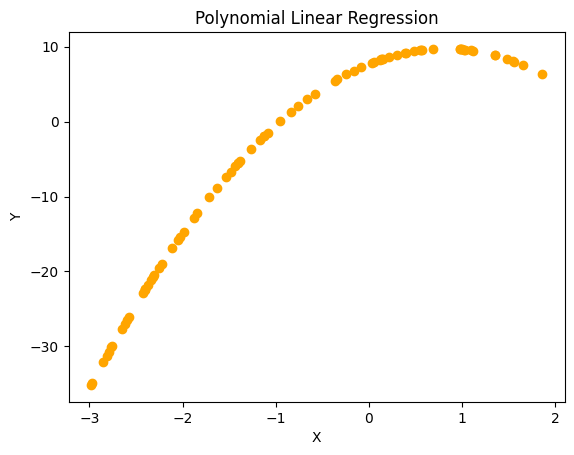

In [31]:
# lets visualize the results
plt.scatter(x_train, Regression_2.predict(x_poly_train), color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Linear Regression')

Text(0.5, 1.0, 'Polynomial Linear Regression')

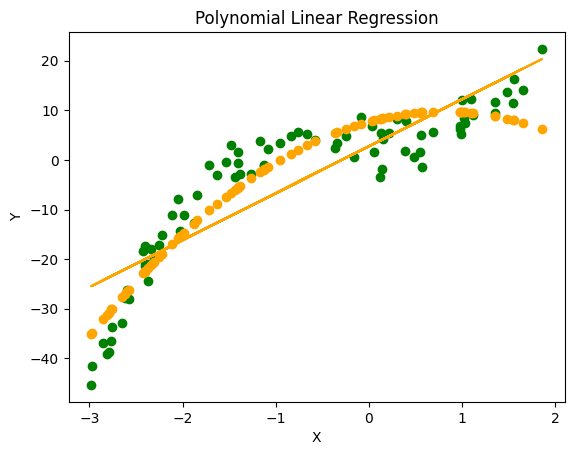

In [32]:
# Complete visualization with both train and predicted points
plt.plot(x_train, Regression_1.predict(x_train), color='orange')
plt.scatter(x_train, y_train, color='g')
plt.scatter(x_train, Regression_2.predict(x_poly_train), color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Linear Regression')

In [27]:
print(Regression_2.coef_)

[[ 0.          5.06164416 -3.11999836]]


In [28]:
print(Regression_2.intercept_)

[7.7075845]


In [33]:
# Compare both models on same data
r2_simple = r2_score(y_test, Regression_1.predict(x_test))
r2_poly = r2_score(y_test, Regression_2.predict(x_poly_test))

print(f"Simple Linear R²: {r2_simple}")
print(f"Polynomial R²: {r2_poly}")

Simple Linear R²: 0.82376274177881
Polynomial R²: 0.8173231442326561


In [34]:
# Test with degree 3
poly_3 = PolynomialFeatures(degree=3, include_bias=True)
x_poly_train_3 = poly_3.fit_transform(x_train)
x_poly_test_3 = poly_3.transform(x_test)

Regression_3 = LinearRegression()
Regression_3.fit(x_poly_train_3, y_train)
r2_poly_3 = r2_score(y_test, Regression_3.predict(x_poly_test_3))
print(f"Polynomial (degree=3) R²: {r2_poly_3}")

# Test with degree 4
poly_4 = PolynomialFeatures(degree=4, include_bias=True)
x_poly_train_4 = poly_4.fit_transform(x_train)
x_poly_test_4 = poly_4.transform(x_test)

Regression_4 = LinearRegression()
Regression_4.fit(x_poly_train_4, y_train)
r2_poly_4 = r2_score(y_test, Regression_4.predict(x_poly_test_4))
print(f"Polynomial (degree=4) R²: {r2_poly_4}")

# Compare all models
print(f"\nComparison:")
print(f"Simple Linear R²: {r2_simple}")
print(f"Polynomial (degree=2) R²: {r2_poly}")
print(f"Polynomial (degree=3) R²: {r2_poly_3}")
print(f"Polynomial (degree=4) R²: {r2_poly_4}")

Polynomial (degree=3) R²: 0.960544088108923
Polynomial (degree=4) R²: 0.9591895635373577

Comparison:
Simple Linear R²: 0.82376274177881
Polynomial (degree=2) R²: 0.8173231442326561
Polynomial (degree=3) R²: 0.960544088108923
Polynomial (degree=4) R²: 0.9591895635373577


## Important Notes on Polynomial Regression

### Key Observations:
1. **Degree Selection Matters**: Your data is generated from a cubic function (`2*x³ + x² + 0.5*x + 3`), so degree=3 should provide the best fit.

2. **Why Degree=2 Might Underperform**: 
   - Lower degree polynomials cannot capture the underlying cubic relationship
   - Results in **underfitting** - the model is too simple for the data

3. **Overfitting Risk with Higher Degrees**:
   - Degree=4 and beyond may overfit, especially with noisy data
   - They fit noise instead of true patterns
   - R² may improve on training data but worsen on test data

4. **Always Compare Test Set R²**: 
   - Never rely only on training R² scores
   - Use test set performance to detect overfitting
   - In this case, compare R² scores across all degrees

5. **Data Leakage Prevention**:
   - Use `fit_transform()` on training data only
   - Use `transform()` on test data with the same transformer
   - This ensures fair comparison and prevents data leakage

### Rule of Thumb:
- **Start with low degree** and gradually increase
- **Monitor test R² score** - stop when it plateaus or decreases
- **Use regularization** (L1/L2) if overfitting occurs

## Prediction of new data

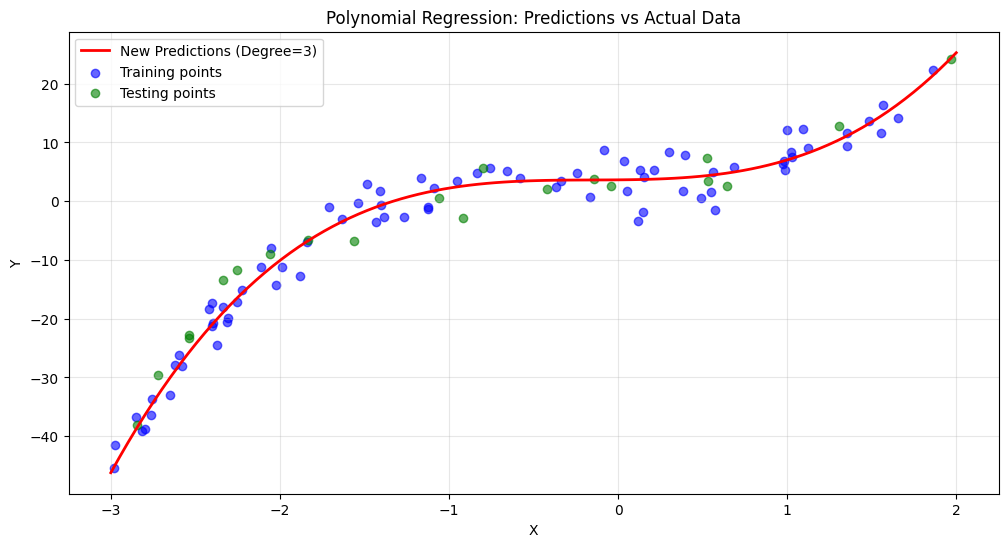

In [38]:
# Prediction of new data
x_new = np.linspace(-3, 2, 100).reshape(100, 1)
x_new_poly = poly_3.transform(x_new)  # Use poly_3 (degree=3) for better predictions
y_new_pred = Regression_3.predict(x_new_poly)

# Visualize predictions with training and testing points
plt.figure(figsize=(12, 6))
plt.plot(x_new, y_new_pred, "r-", linewidth=2, label="New Predictions (Degree=3)")
plt.scatter(x_train, y_train, color='b', label='Training points', alpha=0.6)
plt.scatter(x_test, y_test, color='g', label='Testing points', alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression: Predictions vs Actual Data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Important Notes on Prediction of New Data

### Key Points:

1. **Smooth Prediction Line**:
   - `np.linspace(-3, 2, 100)` creates 100 evenly spaced points for a smooth curve
   - The red line shows the learned polynomial pattern
   - Smooth predictions indicate the model has generalized well

2. **Visualization Insights**:
   - **Red line**: Polynomial model predictions for new inputs
   - **Blue points**: Training data used to train the model
   - **Green points**: Test data used to evaluate performance
   - Points scattered around the red line indicate good fit with reasonable noise

3. **Why This Visualization Matters**:
   - Shows if model captures the underlying pattern
   - Detects overfitting: predictions follow noise instead of true pattern
   - Detects underfitting: predictions miss the actual trend
   - Helps identify if degree selection was appropriate

4. **Extrapolation Risk**:
   - Polynomial models can behave unpredictably **outside** the training data range
   - Avoid making predictions far beyond your data range
   - In this case, stay within [-3, 2] for reliable predictions

5. **Figure Size & Clarity**:
   - `figsize=(12, 6)` provides wider plot for better readability
   - `alpha=0.6` makes scattered points semi-transparent to see overlaps
   - Grid helps in reading exact values from the plot